In [59]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import plotly.express as px
import scipy
import sklearn
import numpy as np

In [60]:
df = pd.read_csv(r'C:\Users\ferna\OneDrive\Desktop\I -nueron\pandas_dataset\Algerian_forest_fires_dataset_UPDATE.csv', header =1)

In [61]:
## Removing Unnecessary Rows From Dataset

df.drop(index=[122,123], inplace=True) 
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [62]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [65]:
df["region"] = 0
df["region"][122:] = 1

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1113079320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["region"][122:] = 1


In [66]:
df.drop(axis = 0 ,index = [122,123,167],inplace = True)

In [67]:
df["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [68]:
df["Classes_New"] = df["Classes  "].str.strip(" ")

In [69]:
df.drop(["Classes  "],axis = 1, inplace=True)

In [70]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'region', 'Classes_New'],
      dtype='object')

In [71]:
df = pd.concat([df,pd.get_dummies(df["Classes_New"])], axis=1)

In [72]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes_New,fire,not fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire,0,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,not fire,0,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire,0,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,not fire,0,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,not fire,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,fire,1,0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1,not fire,0,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,not fire,0,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,not fire,0,1


In [73]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
Classes_New    1
fire           0
not fire       0
dtype: int64

In [74]:
df["Temp"]=df["Temperature"]

In [75]:
df.drop(["Temperature"],axis = 1,inplace = True)

In [76]:
df.drop(["Classes_New"],axis = 1 , inplace = True)

In [77]:
df

,day,month,year,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire,not fire,Temp
0,01,06,2012,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0,1,29
1,02,06,2012,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0,1,29
2,03,06,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0,1,26
3,04,06,2012,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0,1,25
4,05,06,2012,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5,1,1,0,30
240,27,09,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1,0,1,28
241,28,09,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0,1,27
242,29,09,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0,1,24


In [83]:
non_numeric_rows = df[~df['FWI'].str.isnumeric()]

# Optionally, you can also drop these rows to remove them from the DataFrame
df = df[df['FWI'].str.isnumeric()]

# Then, you can convert the 'FWI' column to float
df['FWI'] = df['FWI'].astype(float)

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\3527820887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FWI'] = df['FWI'].astype(float)


In [84]:
df['DC'] = df['DC'].str.replace(' ', '')  # Remove spaces
df['FWI'] = df['FWI'].astype(float) 

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\4273836675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DC'] = df['DC'].str.replace(' ', '')  # Remove spaces
C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\4273836675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FWI'] = df['FWI'].astype(float)


In [85]:
df1 = df.iloc[:,:].astype(float)

<Axes: >

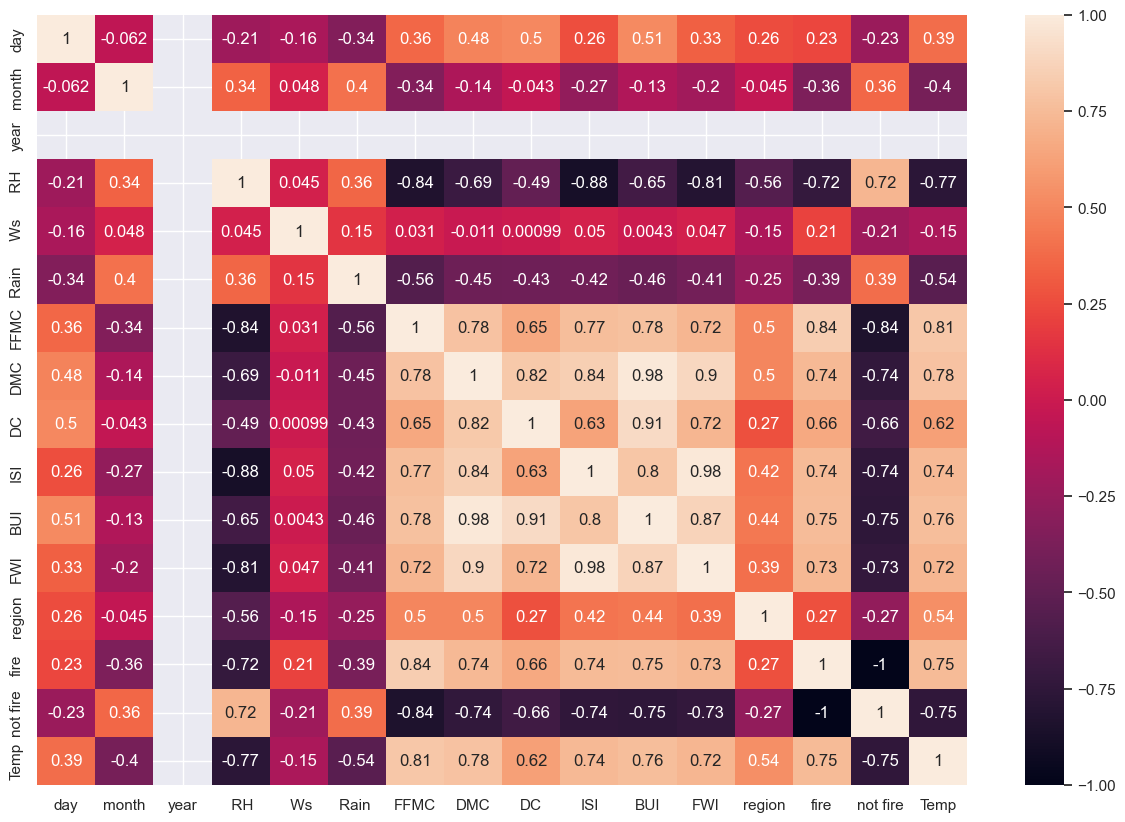

In [86]:
sb.set(rc = {"figure.figsize":(15,10)})
sb.heatmap(df1.corr(),annot = True)

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


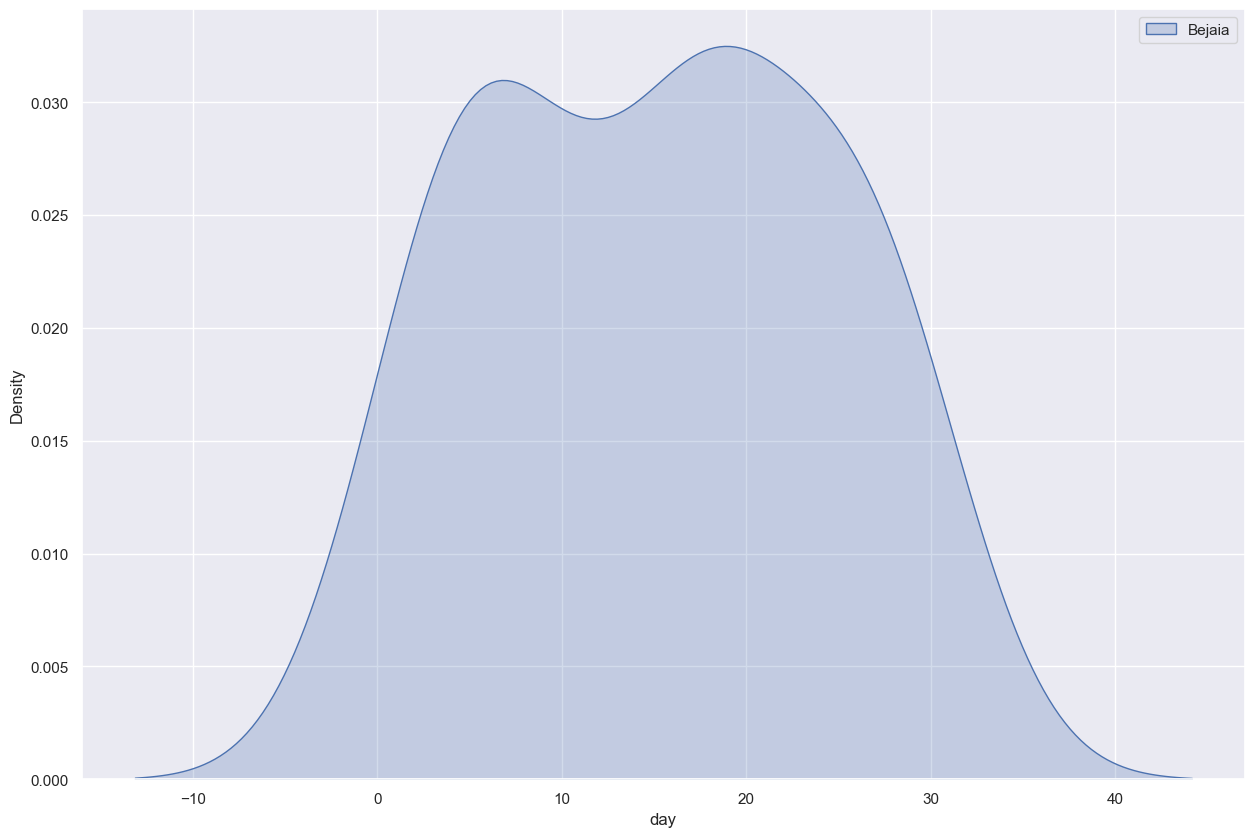

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


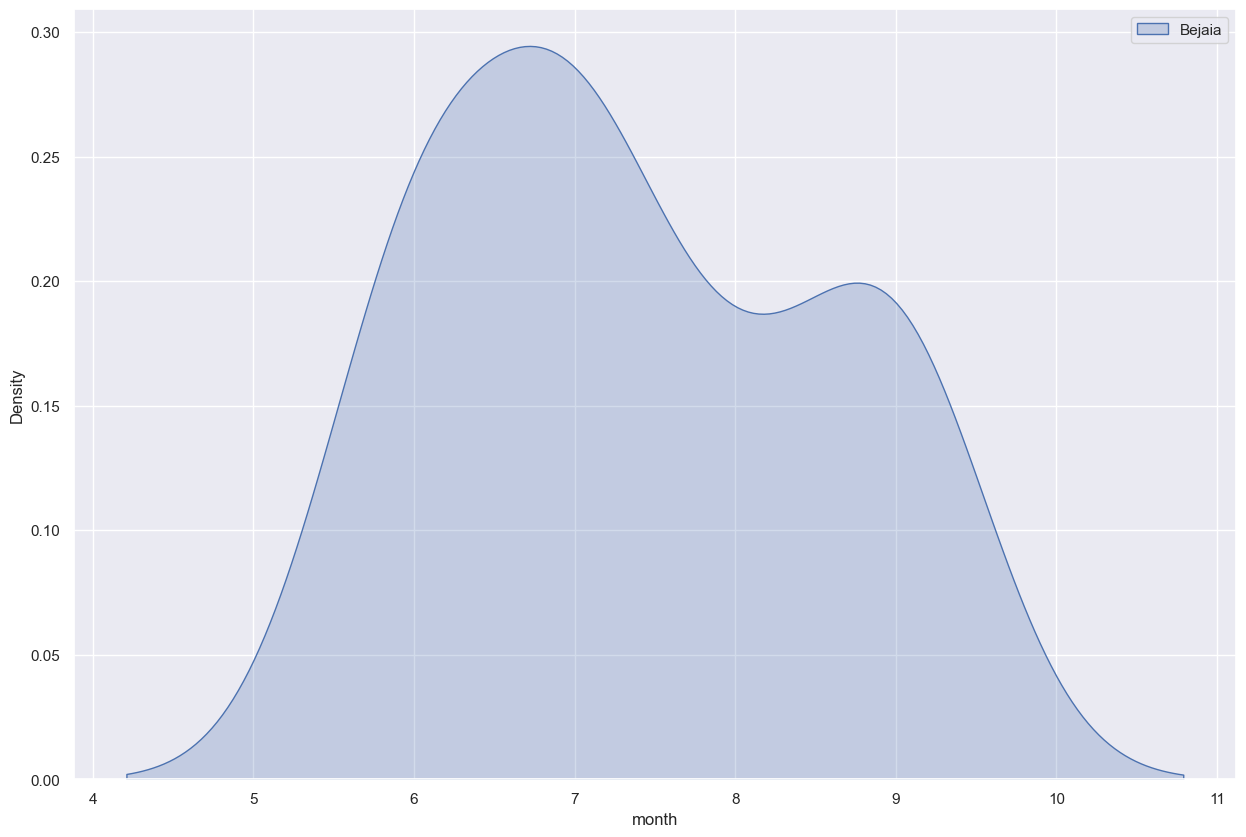

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")
C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


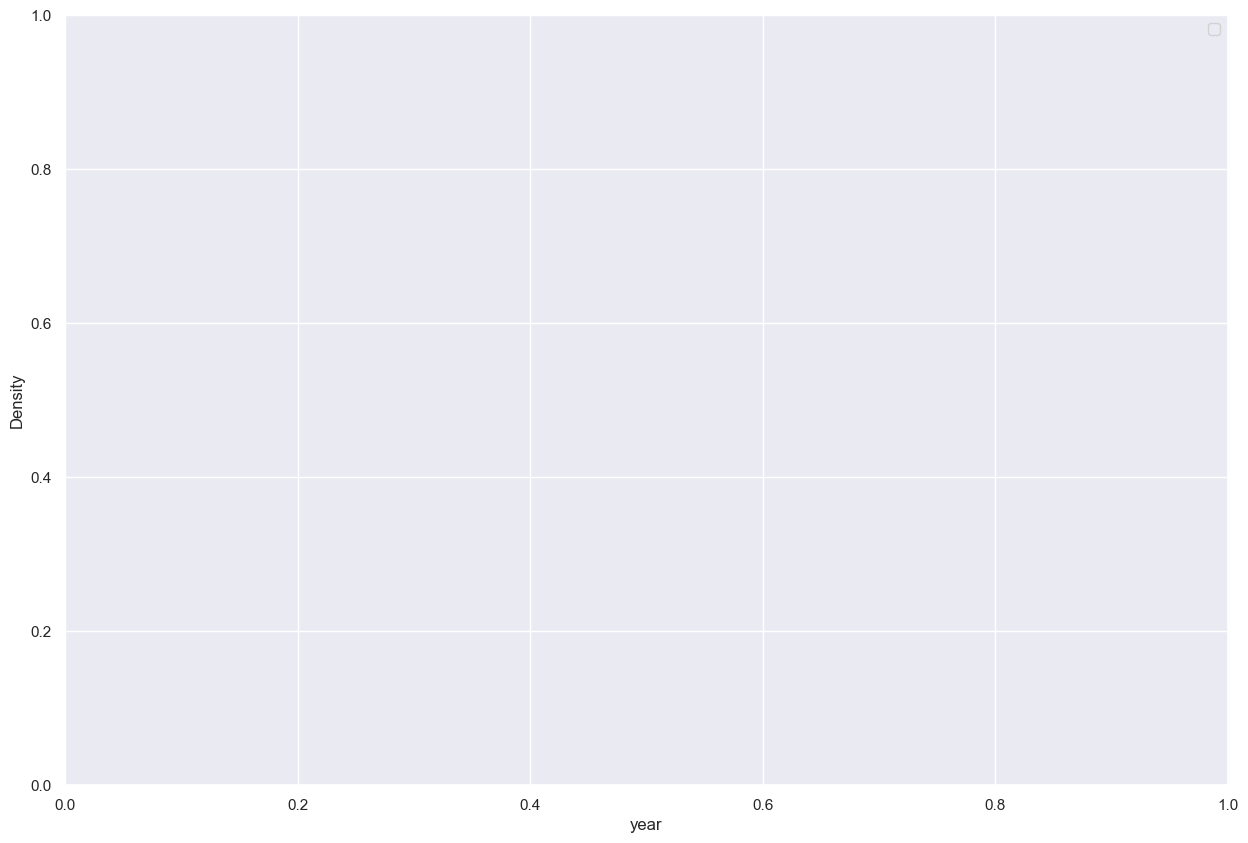

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


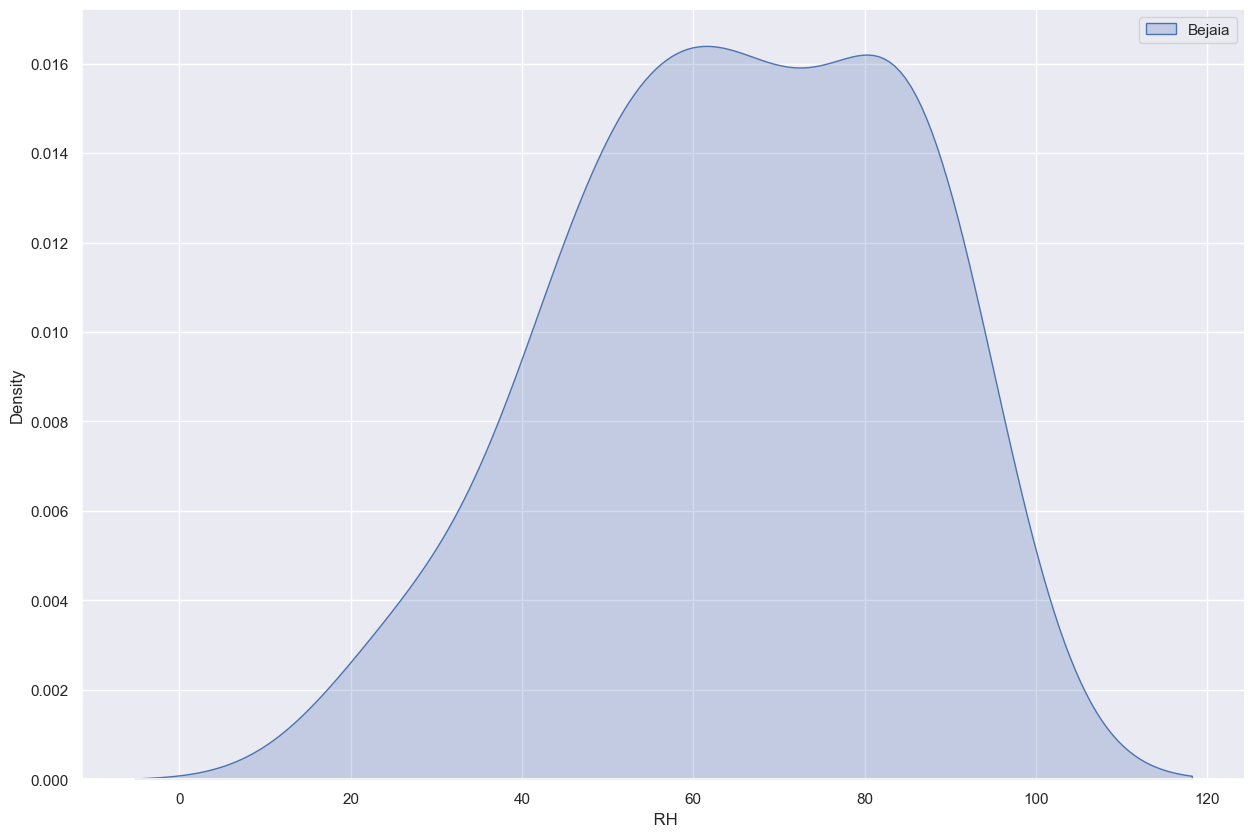

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


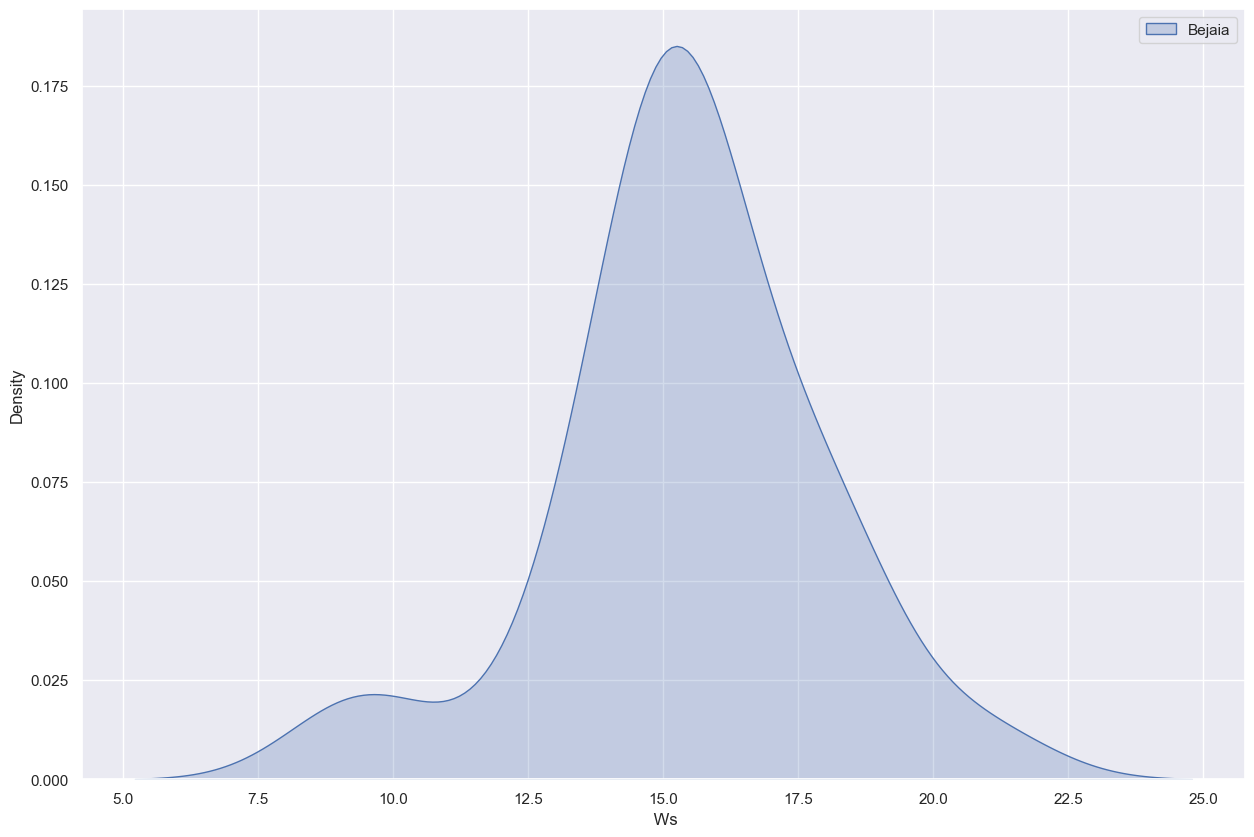

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


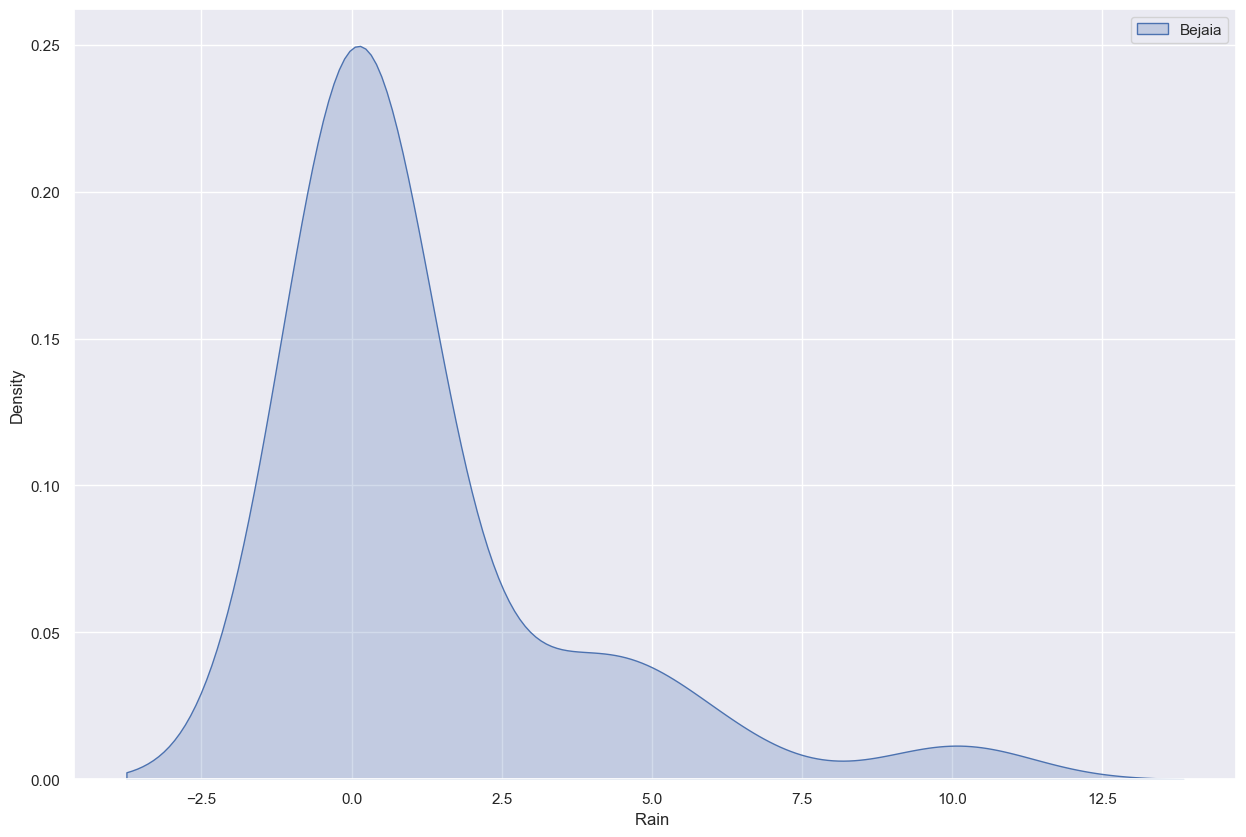

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


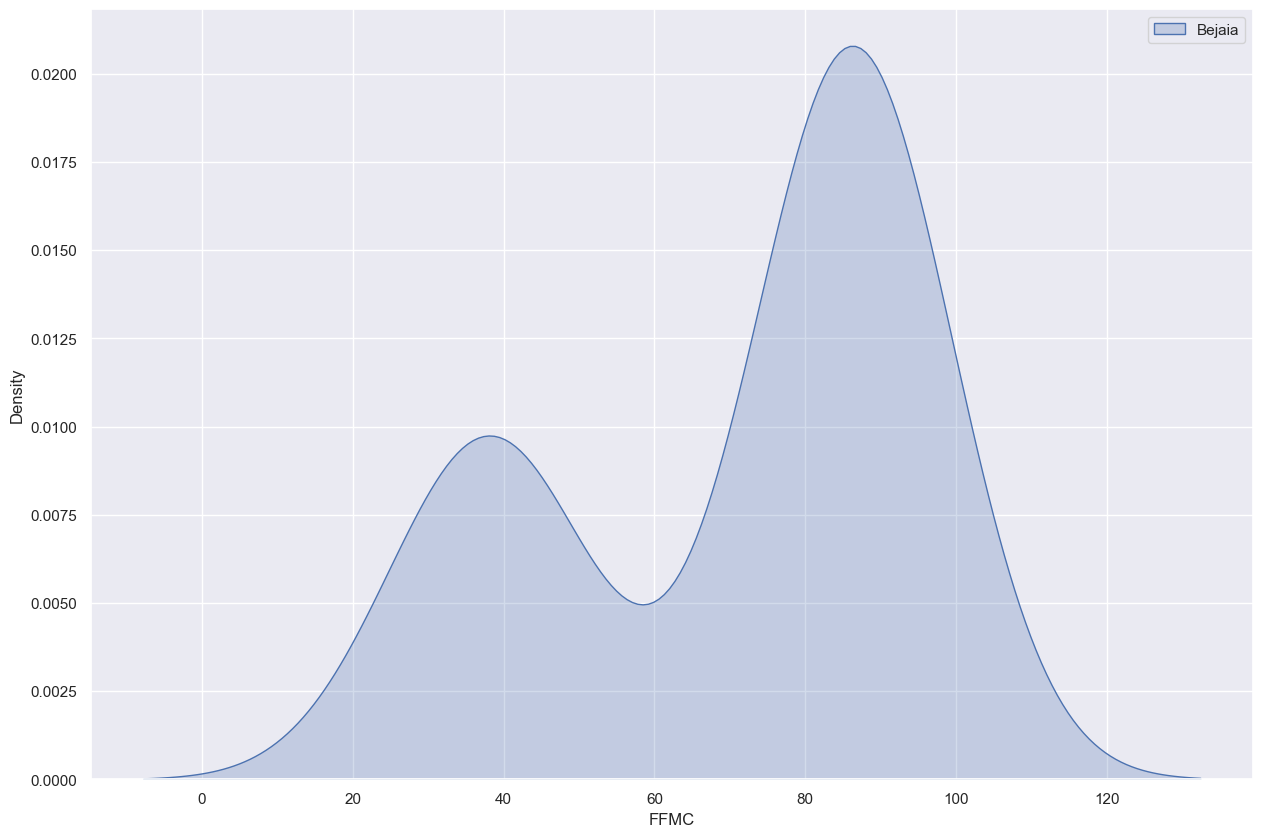

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


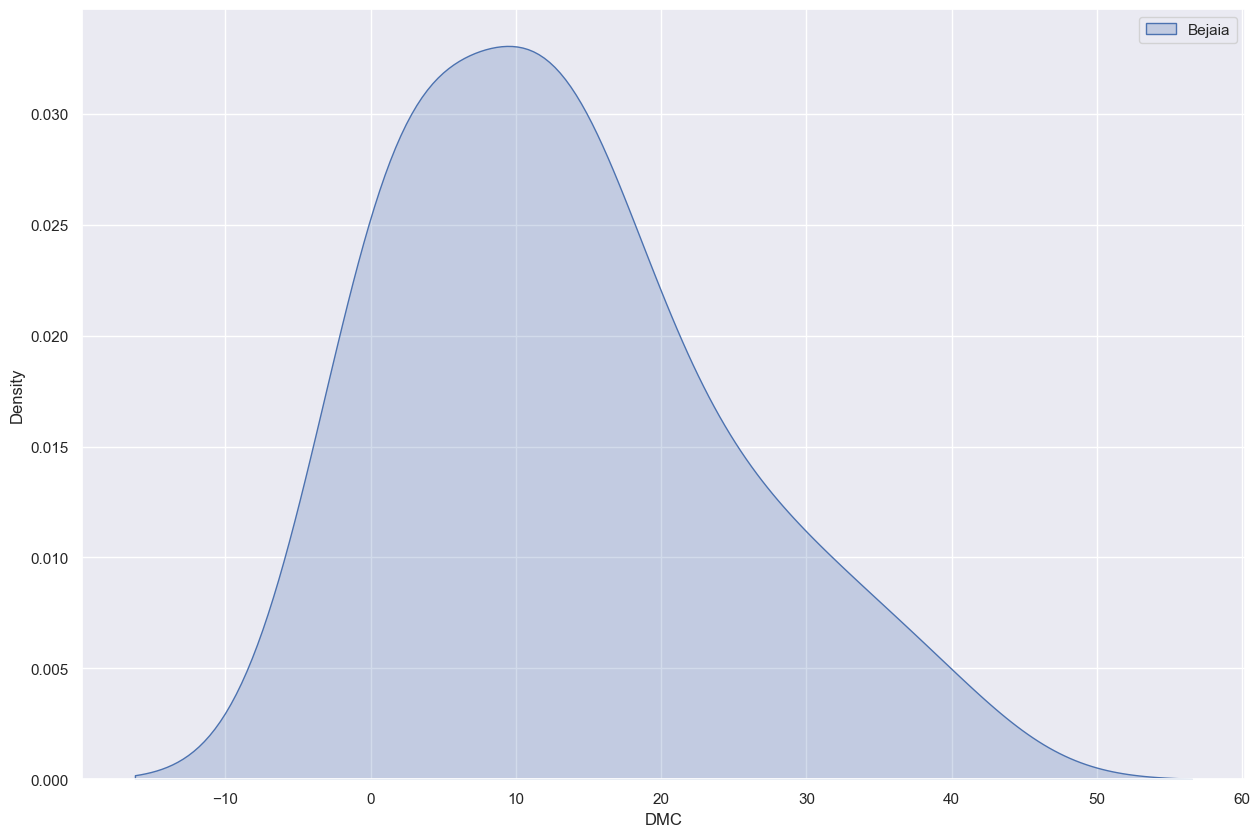

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


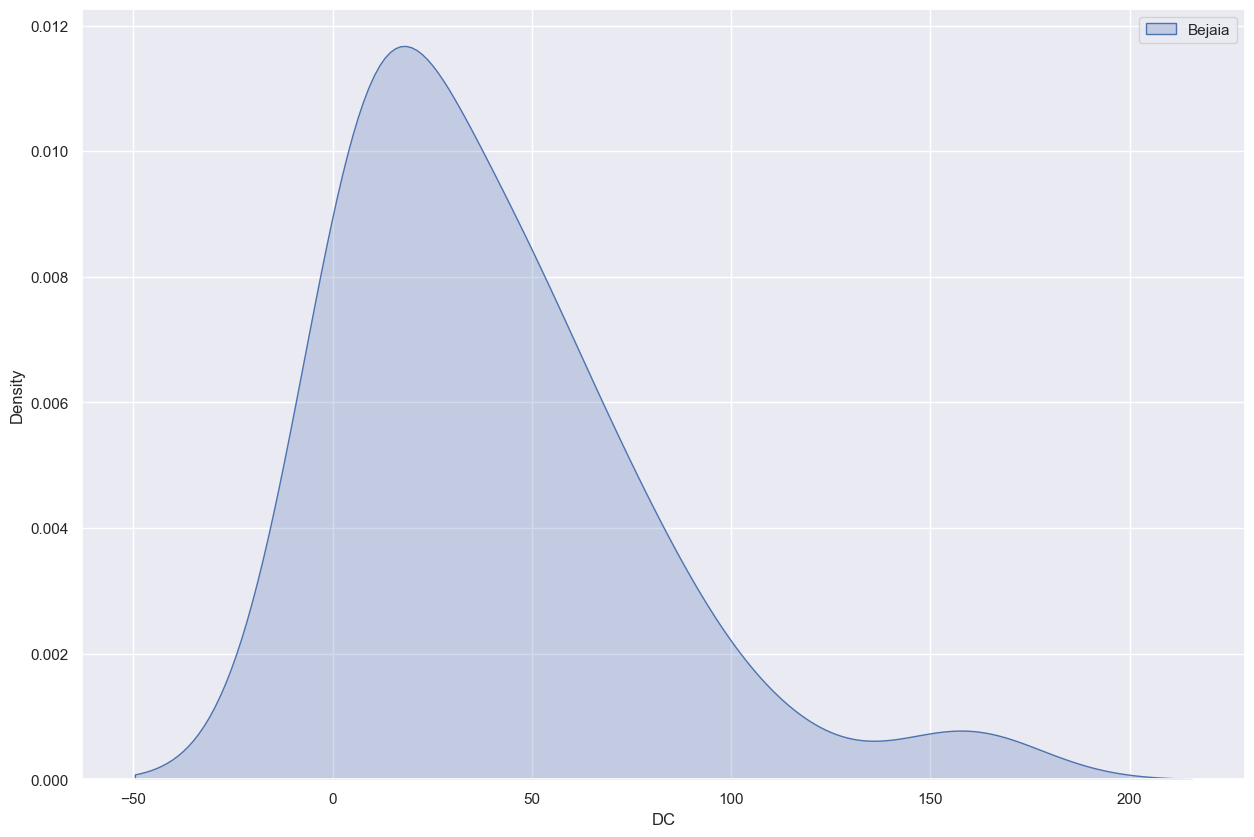

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


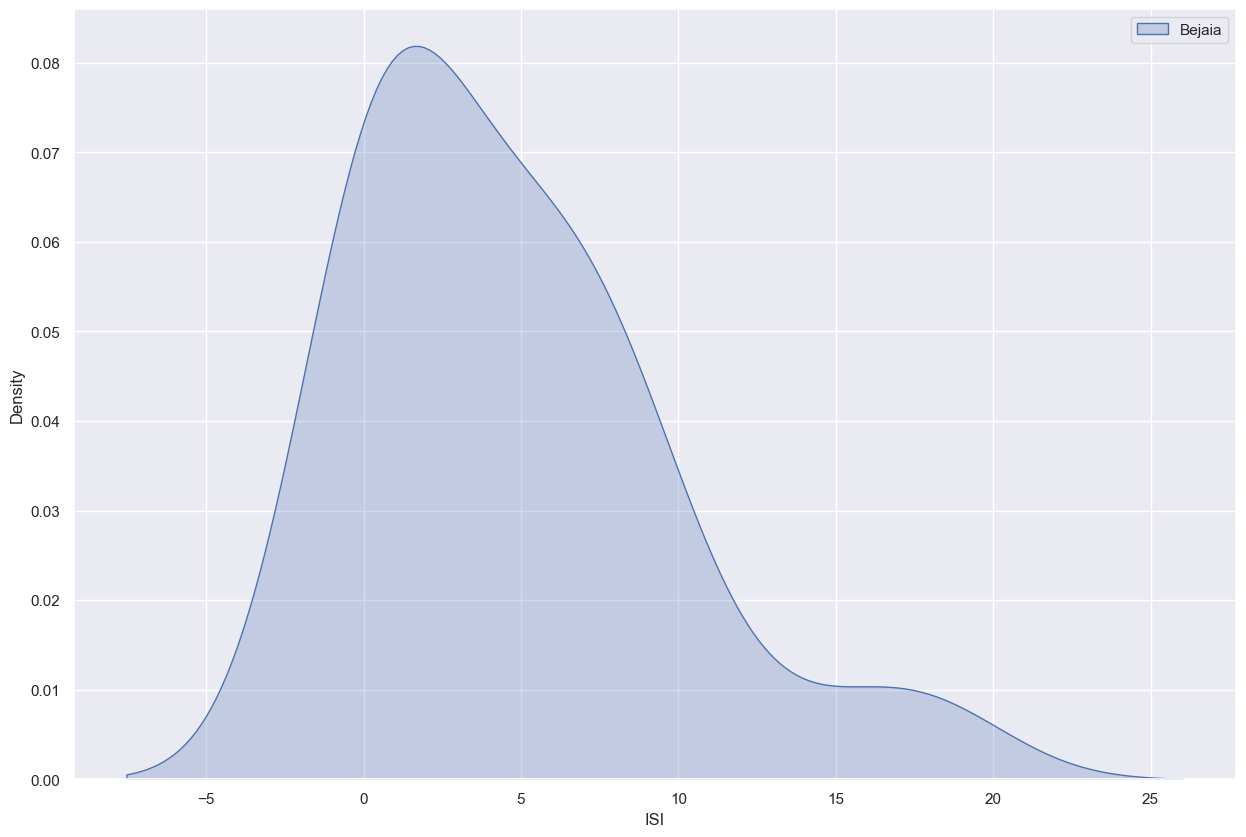

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


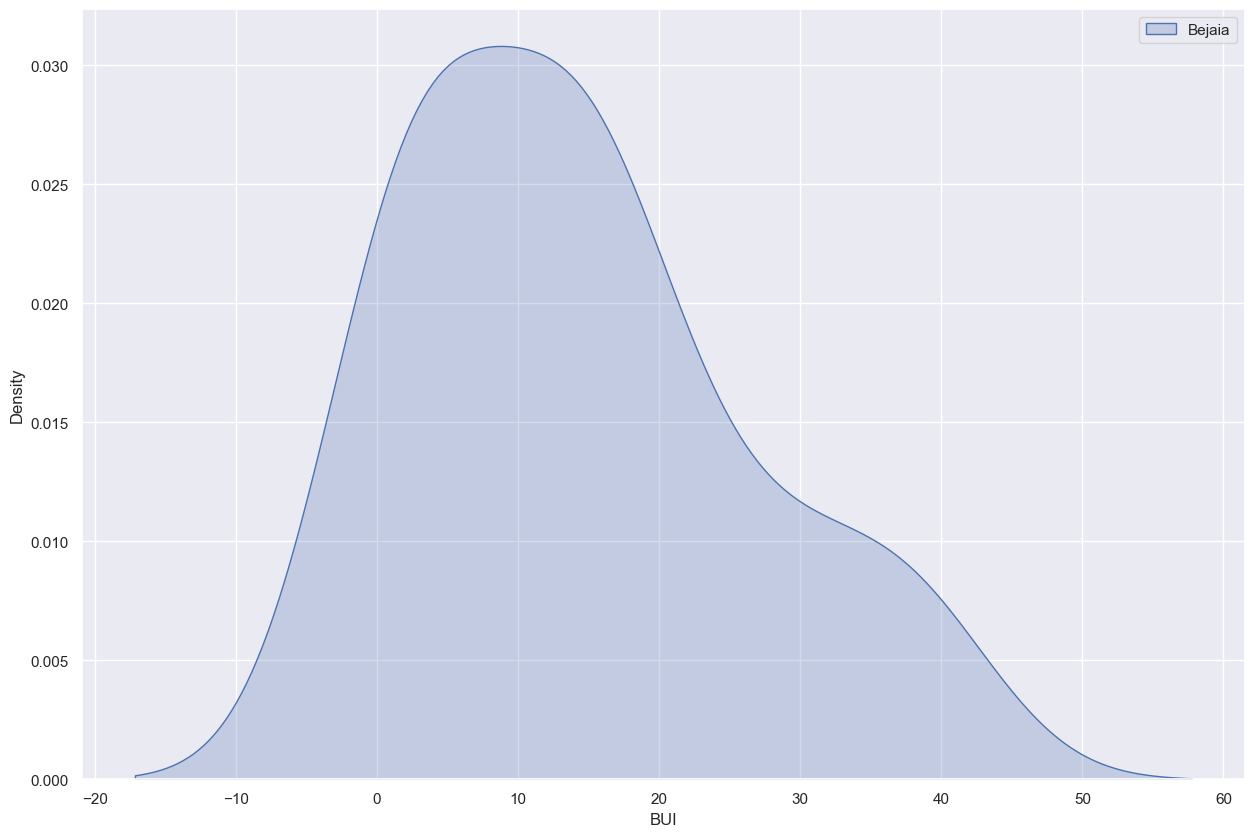

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


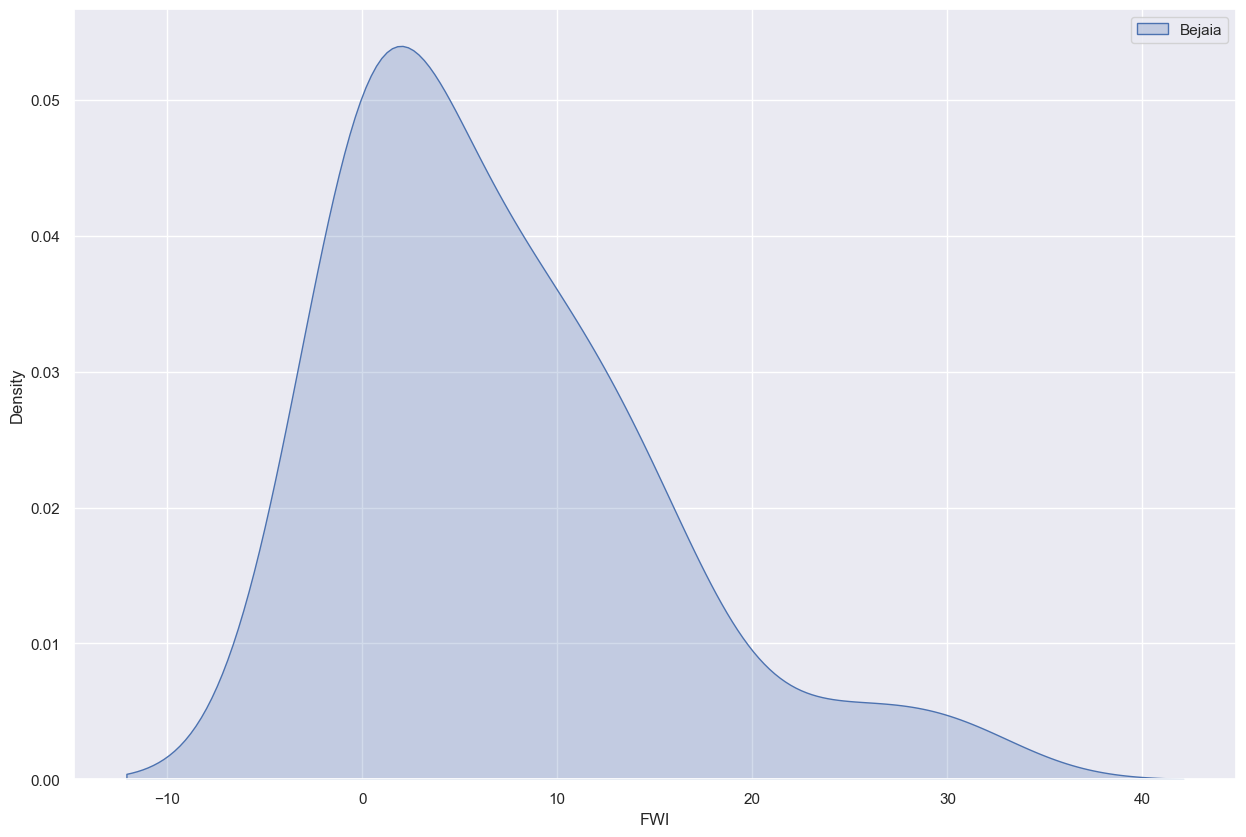

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


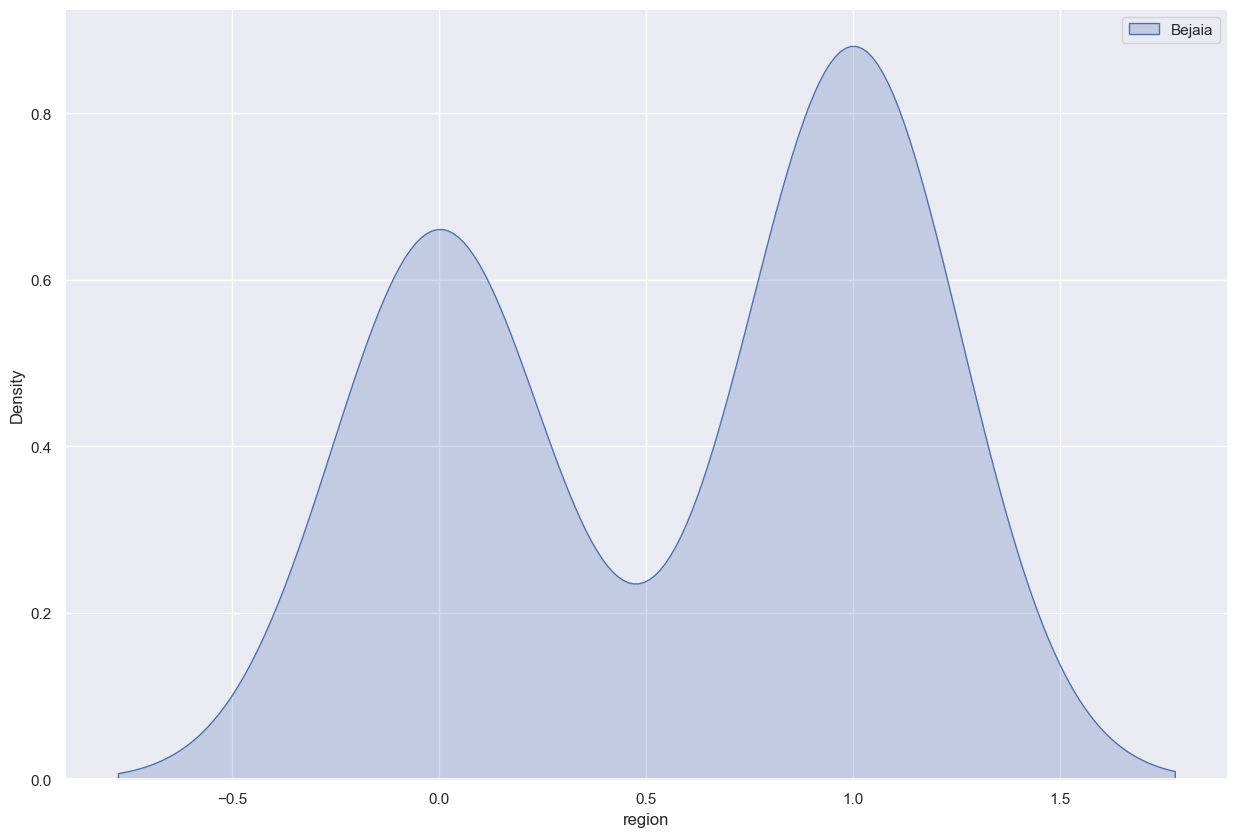

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


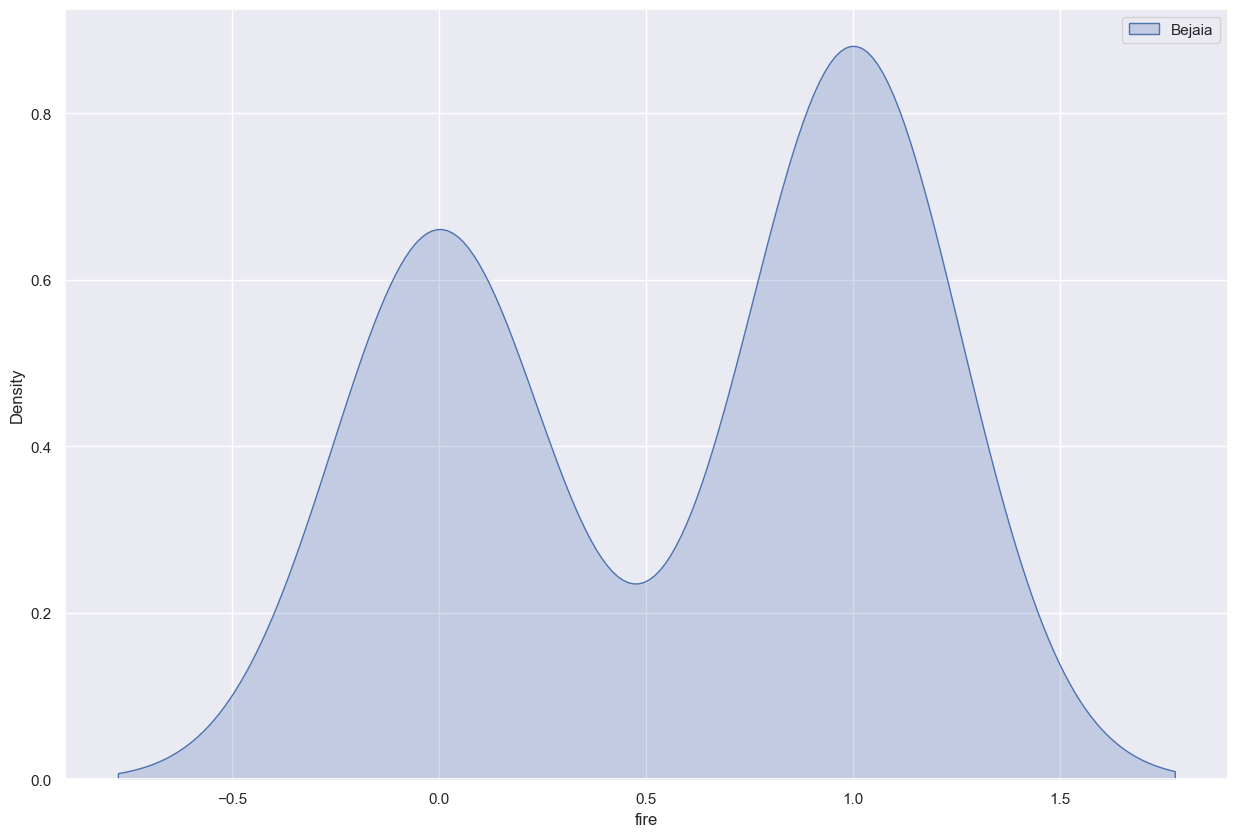

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


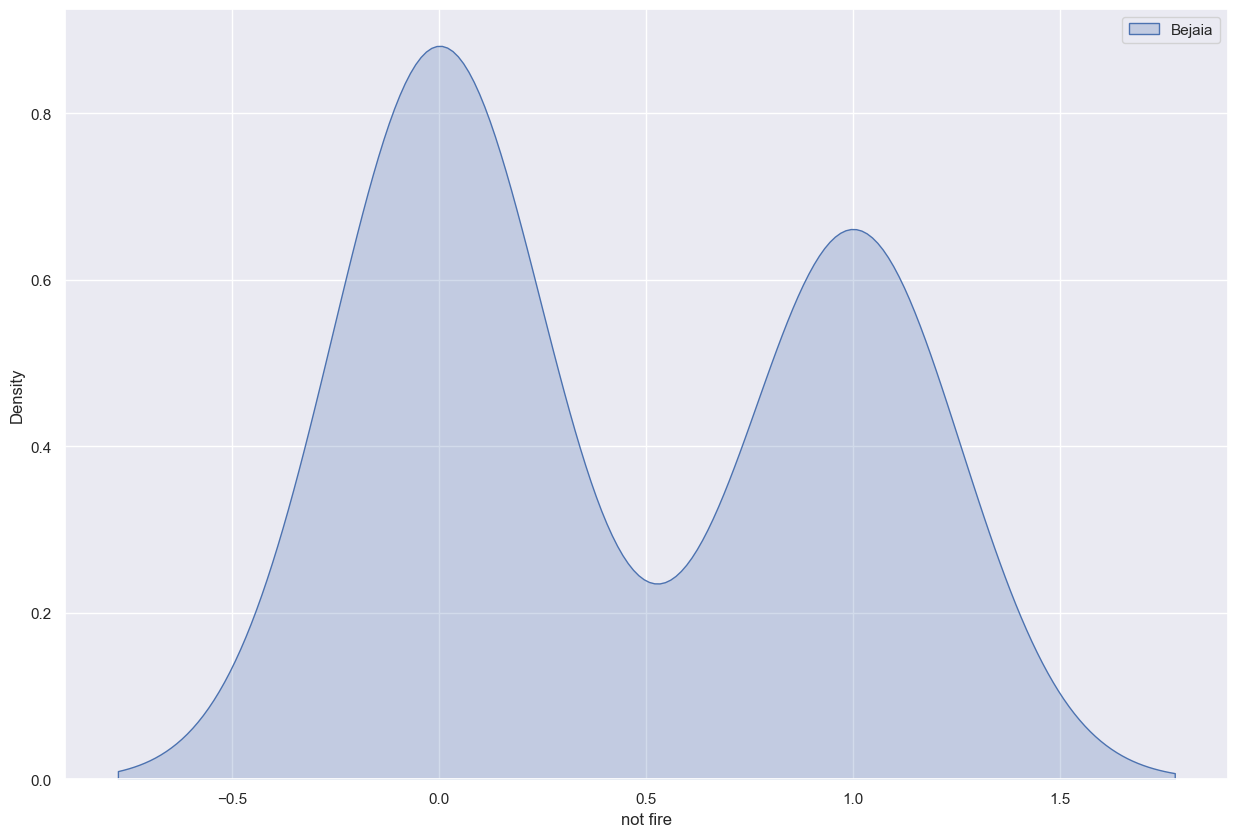

C:\Users\ferna\AppData\Local\Temp\ipykernel_26240\1944734022.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data= df1,shade = True,color = "b")


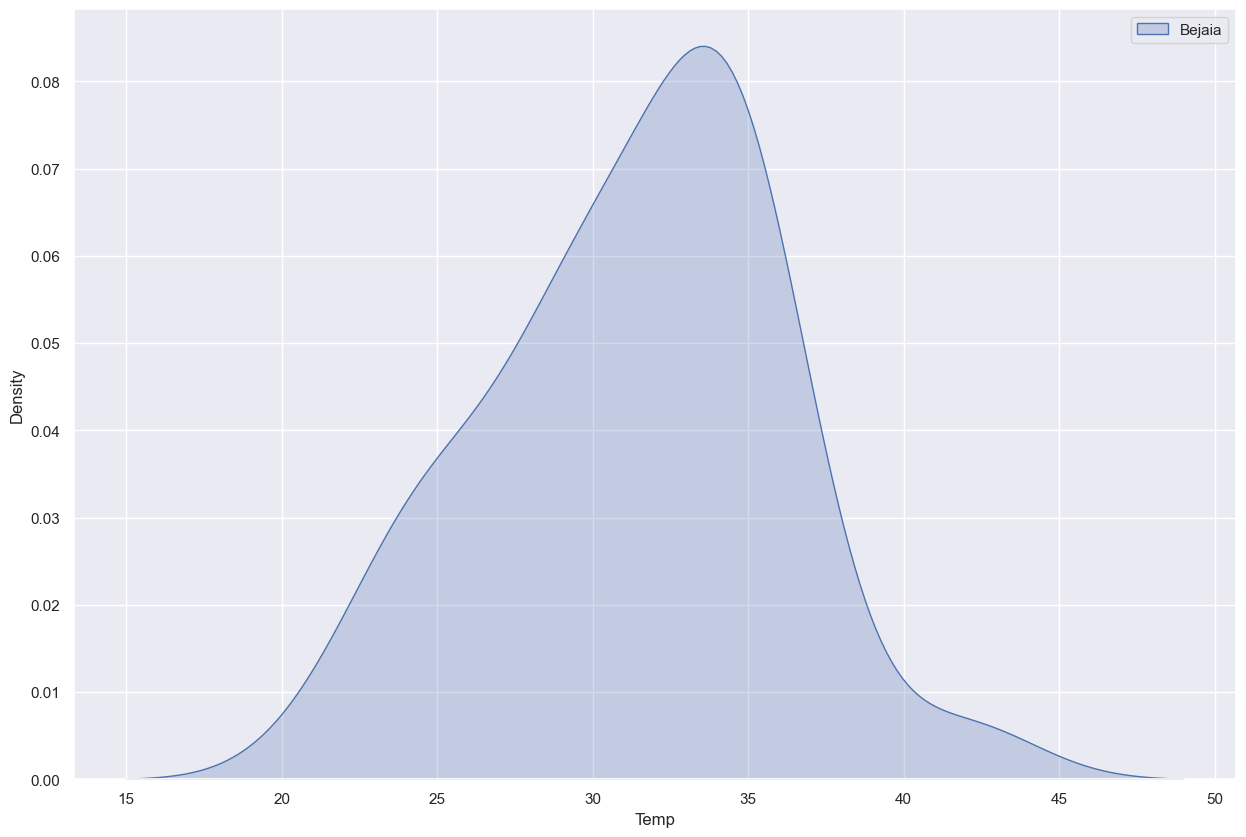

In [87]:

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sb.kdeplot(x=col, data= df1,shade = True,color = "b")
    plt.legend(labels= ['Bejaia'])
    plt.show()

<Axes: xlabel='FFMC', ylabel='Temp'>

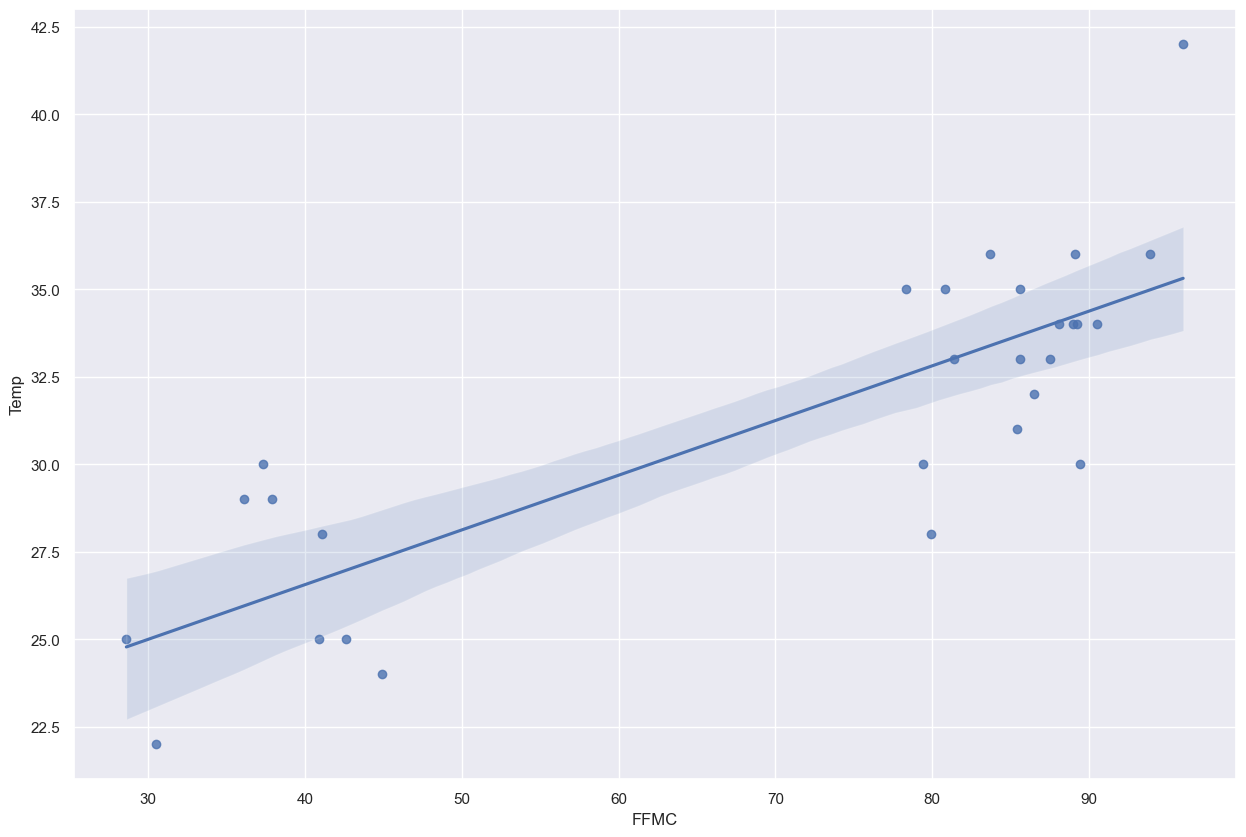

In [88]:
sb.regplot(y = df1["Temp"], x = df1["FFMC"])

<Axes: xlabel=' RH', ylabel='Temp'>

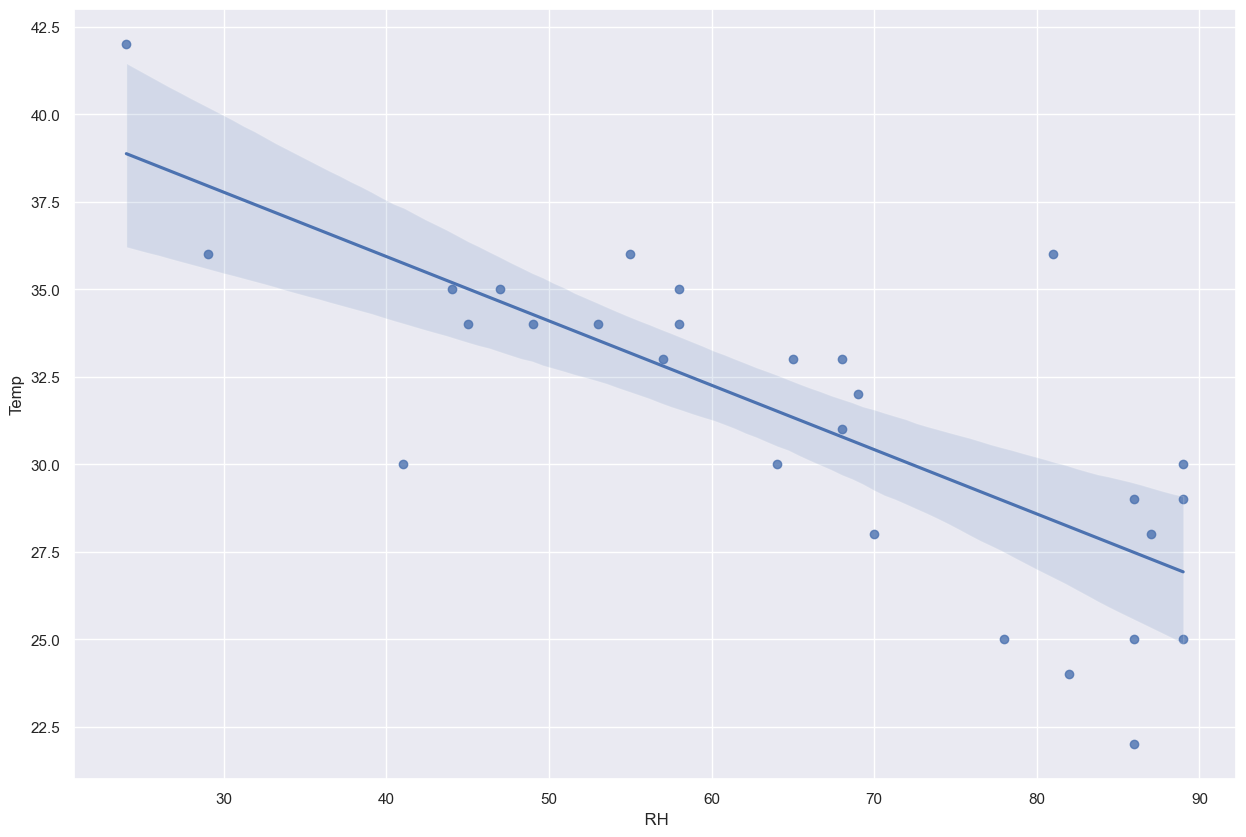

In [89]:

sb.regplot(y = df1["Temp"], x = df1[" RH"])

<Axes: xlabel='FWI', ylabel='Temp'>

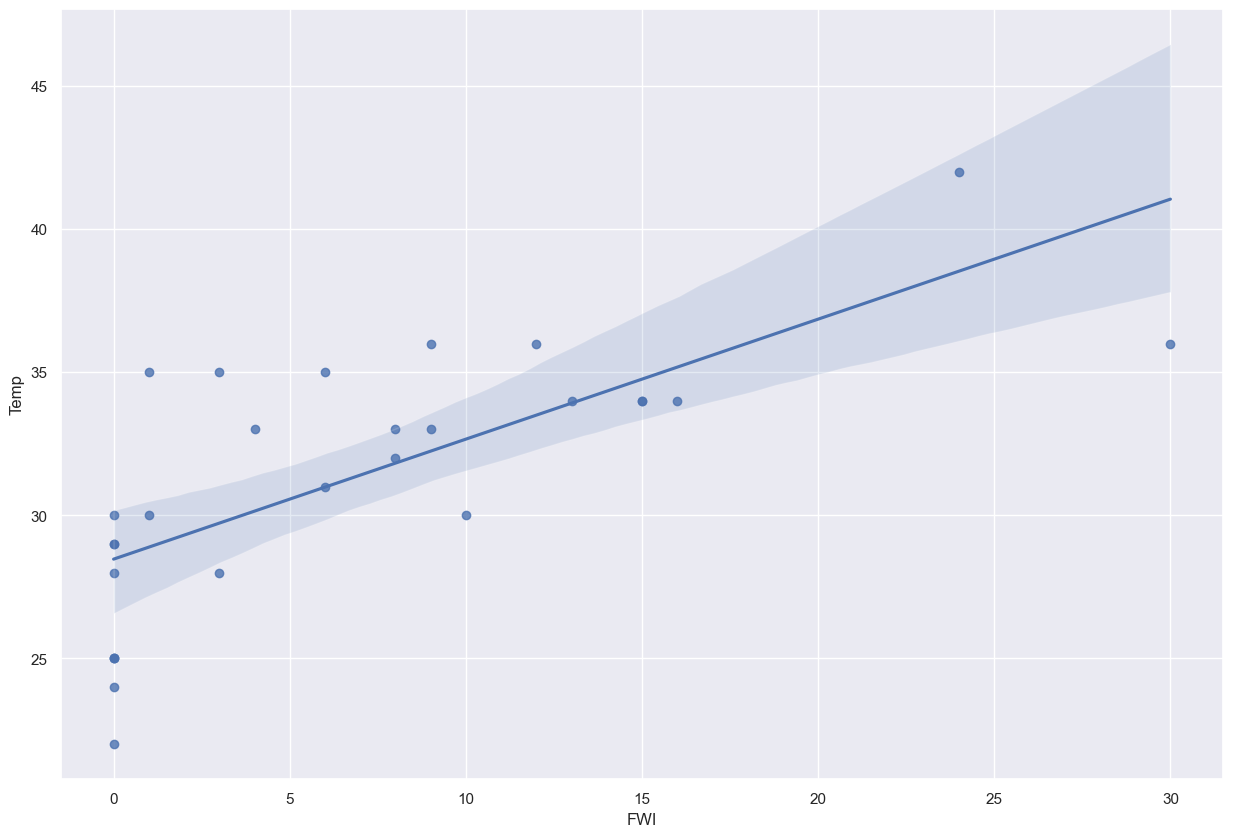

In [90]:
sb.regplot(y = df1["Temp"], x = df1["FWI"])
